In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

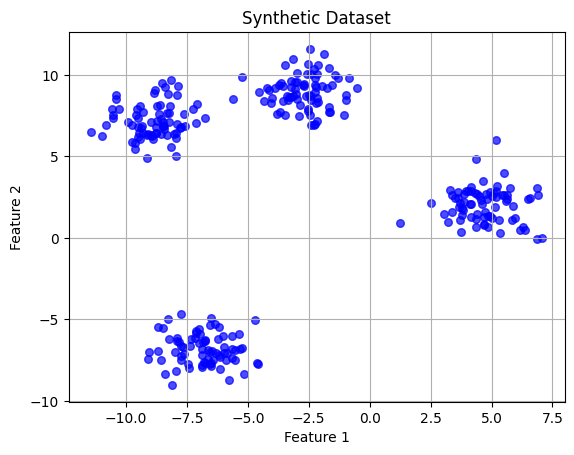

In [2]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=30, alpha=0.7)
plt.title('Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

In [3]:
class KMeansFromScratch:
    def __init__(self, n_clusters, max_iters=300, tolerance=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tolerance = tolerance

    def fit(self, X):
        # Randomly initialize cluster centers
        np.random.seed(42)
        random_indices = np.random.permutation(len(X))[:self.n_clusters]
        self.centers = X[random_indices]

        for iteration in range(self.max_iters):
            # Assign points to nearest cluster
            self.labels = self._assign_clusters(X)

            # Compute new centers
            new_centers = self._compute_centers(X)

            # Check for convergence
            if np.all(np.abs(new_centers - self.centers) < self.tolerance):
                print(f"Converged after {iteration + 1} iterations.")
                break

            self.centers = new_centers

    def predict(self, X):
        return self._assign_clusters(X)

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centers(self, X):
        return np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])


In [4]:
kmeans = KMeansFromScratch(n_clusters=4)
kmeans.fit(X)


Converged after 7 iterations.


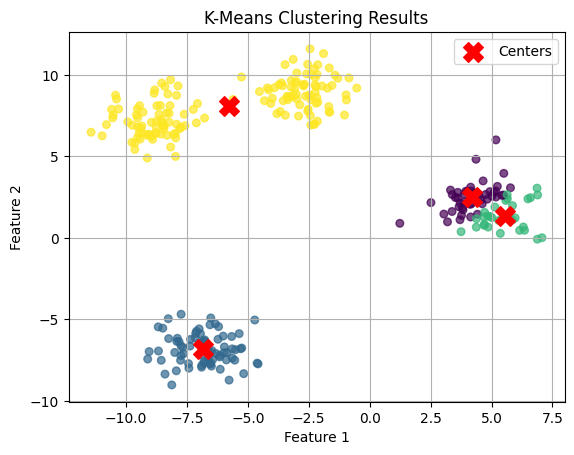

In [5]:
labels = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', s=30, alpha=0.7)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='X', s=200, label='Centers')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

In [6]:
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6101057882340248
